In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3,test_size=0.1)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [4]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaler,y_train)
print('The accuracy is',knn.score(x_test_scaler,y_test)*100,'%')

The accuracy is 100.0 %


In [5]:
def cos_sim(x1,x2):
    return np.dot(x1,x2)/((np.linalg.norm(x1))*((np.linalg.norm(x2))))

In [6]:
def predict(x_train,y_train,x_test,k):
    y=[]
    for i in x_test:
        dist=[]
        for j,val in enumerate(x_train):
            dist.append((cos_sim(i,val),y_train[j]))
        dist=sorted(dist,key=lambda a: a[0],reverse=True)
        dist=dist[:k]
       
        freq={}
       
        for i in dist:
            if i[1] in freq:
                freq[i[1]]=freq[i[1]]+1
            else:
                freq[i[1]]=1
        freq=sorted(freq.items(),key=lambda k:k[1])
        
        val=freq[0][0]
        
        y.append(val)
    return y
    

In [10]:
y_pred3=predict(x_train,y_train,x_test,3)
y_pred5=predict(x_train,y_train,x_test,5)
y_pred7=predict(x_train,y_train,x_test,7)
y_pred9=predict(x_train,y_train,x_test,9)

In [11]:
print('The accuracy for k=3',100*(np.sum(np.where(y_pred3==y_test,1,0))/len(y_test)))
print('The accuracy for k=5',100*(np.sum(np.where(y_pred5==y_test,1,0))/len(y_test)))
print('The accuracy for k=7',100*(np.sum(np.where(y_pred7==y_test,1,0))/len(y_test)))
print('The accuracy for k=9',100*(np.sum(np.where(y_pred9==y_test,1,0))/len(y_test)))

The accuracy for k=3 93.33333333333333
The accuracy for k=5 93.33333333333333
The accuracy for k=7 93.33333333333333
The accuracy for k=9 93.33333333333333


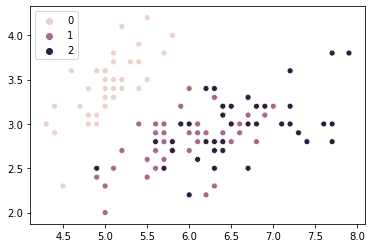

In [9]:
import seaborn as sns
sns.scatterplot(x_train[:,0],x_train[:,1],hue=y_train)